## Credit Fraud Predictor


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- Evaluating machine learning models, particularly in terms of fairness and performance, under various dynamic and biased conditions


### 2) Data Collection
- From: Bank Account Fraud Dataset Suite (NeurIPS 2022)
- Dataset Source - https://www.kaggle.com/datasets/sgpjesus/bank-account-fraud-dataset-neurips-2022/data 

Each dataset is composed of:
- 1 million instances;
- 30 realistic features used in the fraud detection use-case;
- A column of “month”, providing temporal information about the dataset;
- Protected attributes, (age group, employment status and % income).

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import warnings
warnings.filterwarnings('ignore') 

In [2]:
from catboost import CatBoostClassifier

#### Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv('data/fraud.csv')

#### Show Top 5 Records

In [4]:
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


In [5]:
df['proposed_credit_limit'].unique()

array([1500.,  200.,  500., 1000.,  990.,  510., 2000.,  210.,  490.,
        190., 1900., 2100.])

In [6]:
df.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'month'],
      dtype='object')

#### Shape of the dataset

In [7]:
df.shape

(1000000, 32)

In [8]:
# Determin number of fraud cases and plot

fraud = df[df["fraud_bool"] == 1]
valid = df[df["fraud_bool"] == 0]

print(f"Fraud Applications: {len(fraud)} ")
print(f"Non Fraud Applications: {len(valid)}")
print(f"Fraction of fraud and non fraud: {len(fraud)/ len(valid)}")

Fraud Applications: 11029 
Non Fraud Applications: 988971
Fraction of fraud and non fraud: 0.011151995356790038


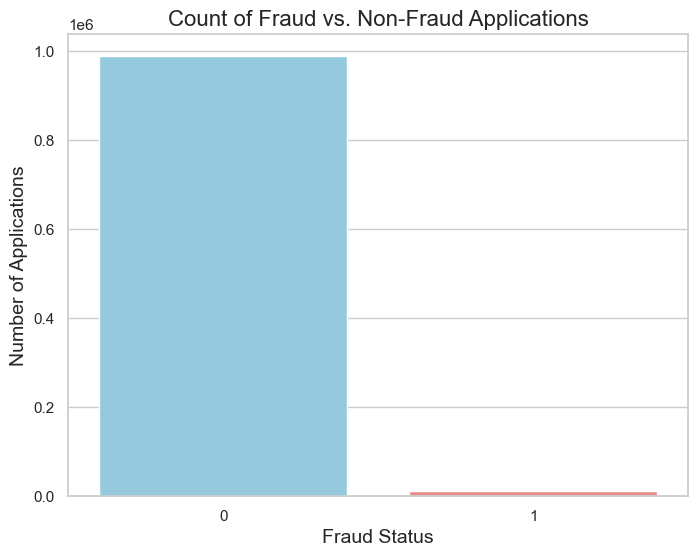

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(8, 6))

# Create a count plot
sns.countplot(x='fraud_bool', data=df, palette=['skyblue', 'lightcoral'])

# Customize the plot
plt.title('Count of Fraud vs. Non-Fraud Applications', fontsize=16)
plt.xlabel('Fraud Status', fontsize=14)
plt.ylabel('Number of Applications', fontsize=14)

# Show the plot
plt.show()


### 2.2 Dataset information

#### Read from datasheet.pdf

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [10]:
df.isna().sum()

fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_leng

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [11]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [12]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

### 3.4 Checking the number of unique values of each column

In [13]:
df.nunique()

fraud_bool                               2
income                                   9
name_email_similarity               998861
prev_address_months_count              374
current_address_months_count           423
customer_age                             9
days_since_request                  989330
intended_balcon_amount              994971
payment_type                             5
zip_count_4w                          6306
velocity_6h                         998687
velocity_24h                        998940
velocity_4w                         998318
bank_branch_count_8w                  2326
date_of_birth_distinct_emails_4w        40
employment_status                        7
credit_risk_score                      551
email_is_free                            2
housing_status                           7
phone_home_valid                         2
phone_mobile_valid                       2
bank_months_count                       33
has_other_cards                          2
proposed_cr

### 3.5 Check statistics of data set

In [14]:
df.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000
mean,0.011029,0.562696,0.493694,16.718568,86.587867,33.689080,1.025705e+00,8.661499,1572.692049,5665.296605,...,0.889676,10.839303,0.222988,515.851010,0.025242,7.544940,0.576947,1.018312,0.0,3.288674
std,0.104438,0.290343,0.289125,44.046230,88.406599,12.025799,5.381835e+00,20.236155,1005.374565,3009.380665,...,0.313293,12.116875,0.416251,487.559902,0.156859,8.033106,0.494044,0.180761,0.0,2.209994
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,1.000000,-170.603072,...,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000
25%,0.000000,0.300000,0.225216,-1.000000,19.000000,20.000000,7.193246e-03,-1.181488,894.000000,3436.365848,...,1.000000,-1.000000,0.000000,200.000000,0.000000,3.103053,0.000000,1.000000,0.0,1.000000
50%,0.000000,0.600000,0.492153,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,...,1.000000,5.000000,0.000000,200.000000,0.000000,5.114321,1.000000,1.000000,0.0,3.000000
75%,0.000000,0.800000,0.755567,12.000000,130.000000,40.000000,2.633069e-02,4.984176,1944.000000,7680.717827,...,1.000000,25.000000,0.000000,500.000000,0.000000,8.866131,1.000000,1.000000,0.0,5.000000
max,1.000000,0.900000,0.999999,383.000000,428.000000,90.000000,7.845690e+01,112.956928,6700.000000,16715.565404,...,1.000000,32.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,2.000000,0.0,7.000000


#### Insight
- Mean customer age is 33
- Some variables contains negative values, this indicate missing data that need to be processed

### 3.7 Exploring Data

In [15]:
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


In [16]:
df['device_fraud_count'].unique

<bound method Series.unique of 0         0
1         0
2         0
3         0
4         0
         ..
999995    0
999996    0
999997    0
999998    0
999999    0
Name: device_fraud_count, Length: 1000000, dtype: int64>

In [17]:
# define numerical & categorical columns
num_features = ['income', 'name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'customer_age', 'days_since_request'
                    , 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 
                    'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'bank_months_count', 'proposed_credit_limit',  'session_length_in_minutes',
                    'device_distinct_emails', 'device_fraud_count', 'month']


cat_features = ['payment_type', 'employment_status', 'email_is_free', 'housing_status', 'phone_home_valid','phone_mobile_valid', 'has_other_cards'
                        , 'foreign_request', 'source', 'device_os', 'keep_alive_session', 'fraud_bool']

# print columns
print('We have {} numerical features : {}'.format(len(num_features), num_features))
print('\nWe have {} categorical features : {}'.format(len(cat_features), cat_features))

We have 20 numerical features : ['income', 'name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'customer_age', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'bank_months_count', 'proposed_credit_limit', 'session_length_in_minutes', 'device_distinct_emails', 'device_fraud_count', 'month']

We have 12 categorical features : ['payment_type', 'employment_status', 'email_is_free', 'housing_status', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'foreign_request', 'source', 'device_os', 'keep_alive_session', 'fraud_bool']


### 3.8 Visualizing distribution of all the variables
- Protected attributes, (age group, employment status and % income).

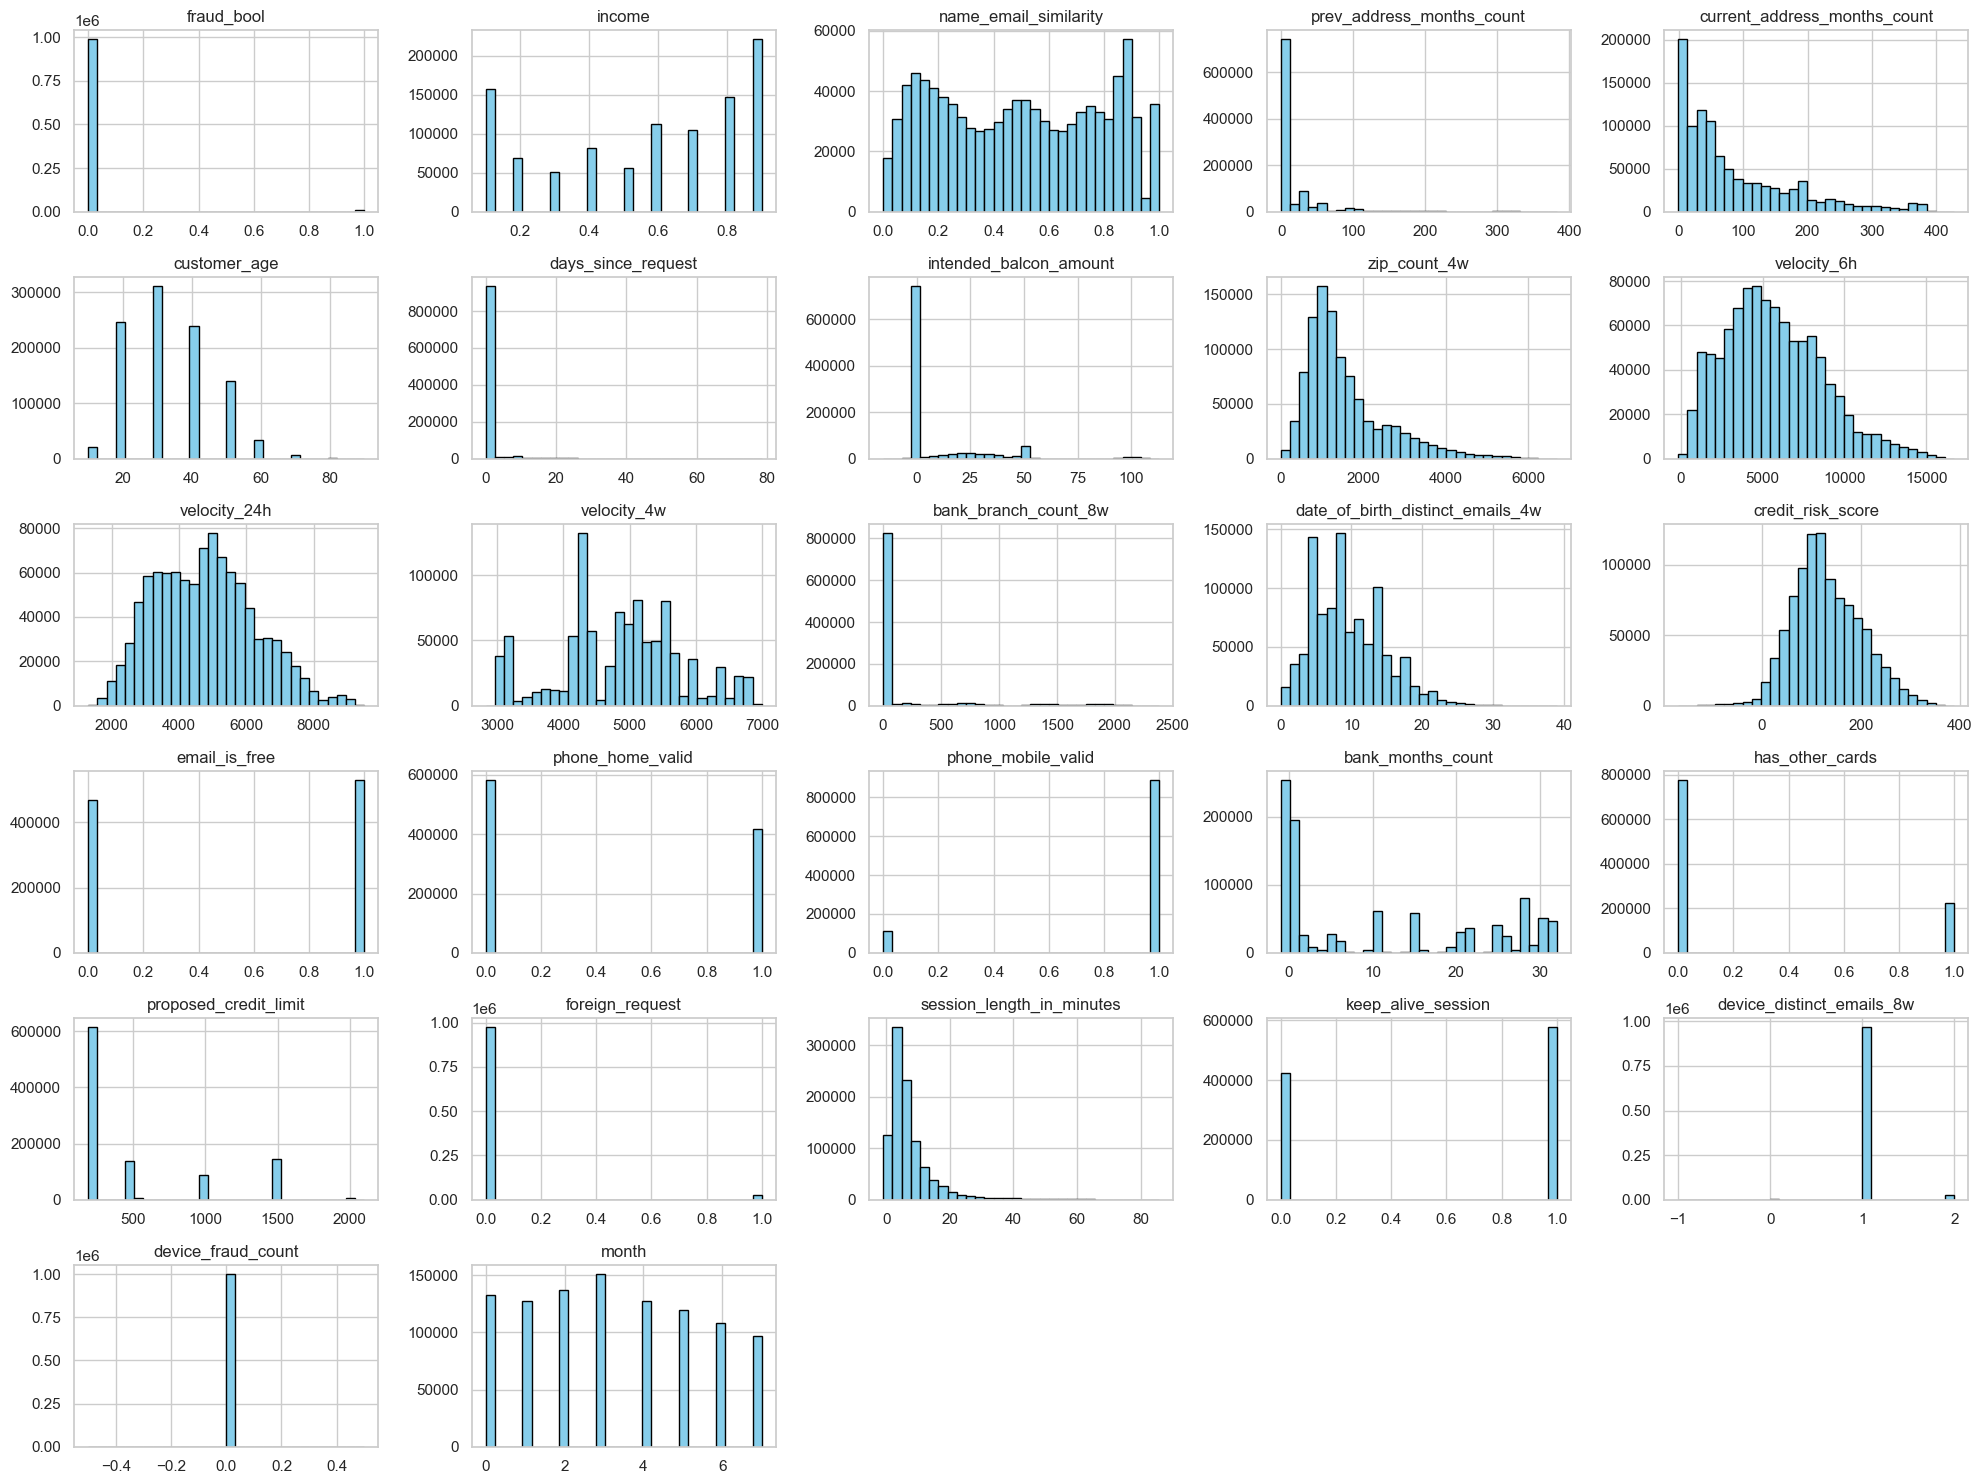

In [18]:
# Automatically plots histograms for all numerical columns
df.hist(bins=30, figsize=(20, 15), color='skyblue', edgecolor='black')

plt.tight_layout()  # Adjusts subplot params for a neat layout
plt.show()

#### Insights:
- device_fraud_count only have unique value of 0 -> consider drop to reduce dimension

#### Note : Some variables contains negative values, this indicate missing data that need to be processed

### 4. Data Cleaning and Preprocessing

- Workflow:

1. Split your data into train and test sets.
2. Drop, Impute missing values (fit on train, transform test).
3. Select features (fit on train, apply to test).
4. Scale numerical features (fit on train, transform test).
5. Encode categorical features (fit on train, transform test).

#### 4.1 Handling Missing Values

In [19]:
columns_to_check = ['prev_address_months_count', 'current_address_months_count', 'intended_balcon_amount', 'bank_months_count', 
                    'session_length_in_minutes', 'device_distinct_emails_8w']  

# Convert negative value to nan
df[columns_to_check] = df[columns_to_check].where(df[columns_to_check] >= 0, np.nan)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         287080 non-null   float64
 4   current_address_months_count      995746 non-null   float64
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            257477 non-null   float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

#### 4.1.2 Draw box plot of all missing data


In [21]:
df_missing = df[['prev_address_months_count', 'current_address_months_count', 'intended_balcon_amount', 'bank_months_count', 'session_length_in_minutes', 
                 'device_distinct_emails_8w']]
df_missing

,prev_address_months_count,current_address_months_count,intended_balcon_amount,bank_months_count,session_length_in_minutes,device_distinct_emails_8w
0,NaN,25.0,102.453711,9.0,16.224843,1.0
1,NaN,89.0,NaN,2.0,3.363854,1.0
2,9.0,14.0,NaN,30.0,22.730559,1.0
3,11.0,14.0,NaN,1.0,15.215816,1.0
4,NaN,29.0,47.152498,26.0,3.743048,1.0
...,...,...,...,...,...,...
999995,NaN,143.0,NaN,31.0,16.967770,1.0
999996,NaN,193.0,0.008307,NaN,1.504109,1.0
999997,NaN,202.0,50.609995,31.0,16.068595,1.0
999998,52.0,3.0,NaN,1.0,1.378683,1.0


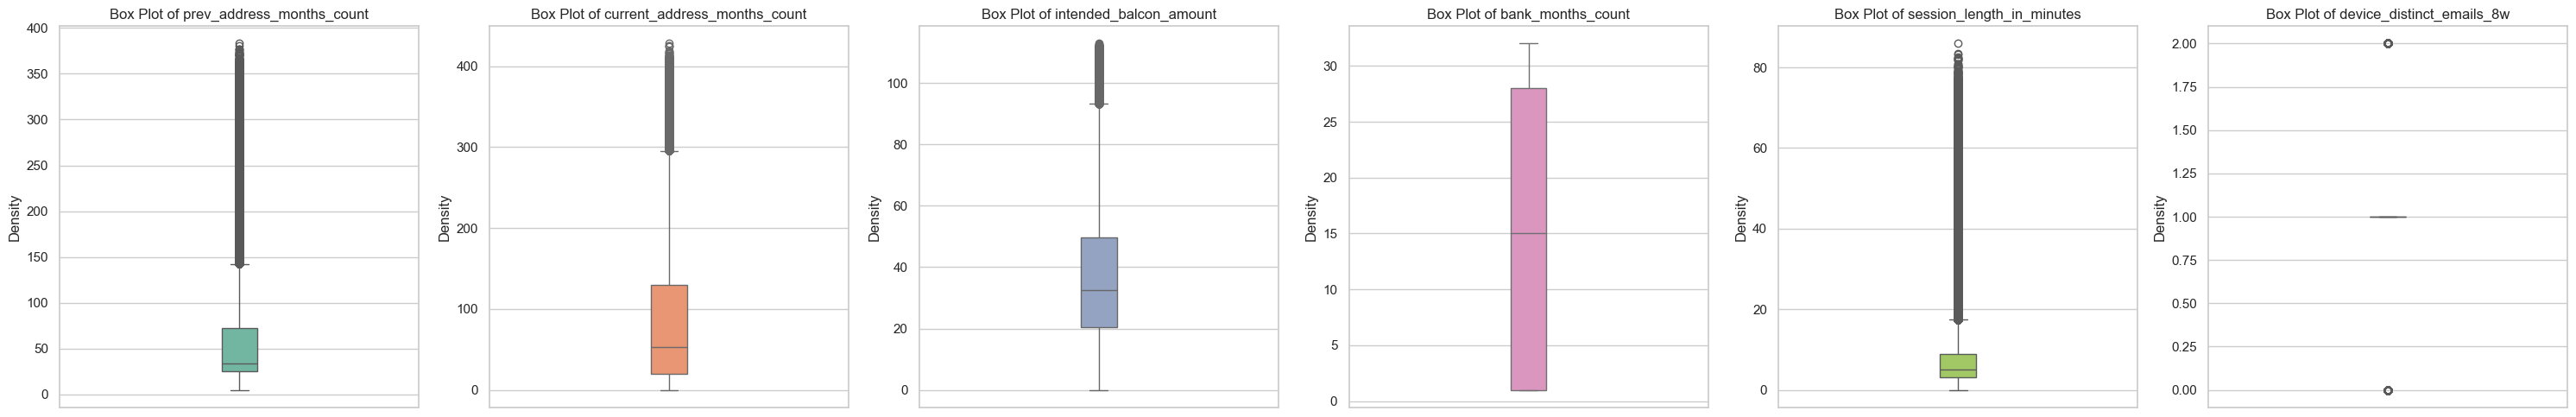

In [22]:
# Create box plots for multiple features
# Determine the number of features
num_features = len(df_missing.columns)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=num_features, figsize=(num_features * 5, 5))

# Ensure axes is iterable
if num_features == 1:
    axes = [axes]

# Define a color palette
colors = sns.color_palette('Set2', num_features)

# Loop through each feature
for i, (ax, column) in enumerate(zip(axes, df_missing.columns)):
    # Plot the KDE plot
    #sns.kdeplot(data=df_missing[column], ax=ax, color=colors[i], fill=True, alpha=0.3)
    
    # Add the box plot on the same axes
    sns.boxplot(y=df_missing[column], ax=ax, width=0.1, color=colors[i])

    ax.set_title(f'Box Plot of {column}')
    ax.set_xlabel('')
    ax.set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

#### Insights

- Scaling, encoding: 
    - **device_distinct_emails_8w**: One-Hot Encoding (nominal categorical)
    - **session_length_in_minutes**: Robust Scaling (outliers)
    - **intended_balcon_amount**: consider dropping (High percentage of missing in a feature)
    - **current_address_months_count**: Robust Scaling (outliers)
    - **prev_address_months_count**: consider dropping (High percentage of missing in a feature)
- Filling NA:
    - **device_distinct_emails_8w**: SimpleImputer(strategy='most_frequent')
    - **session_length_in_minutes**: SimpleImputer(strategy='median')
    - **intended_balcon_amount**: consider dropping (High percentage of missing in a feature)
    - **current_address_months_count**: SimpleImputer(strategy='median') (outliers)
    - **prev_address_months_count**: consider dropping (High percentage of missing in a feature)

#### 4.1.3 Dropping features 

In [23]:
#drop intended_balcon_amount and prev_address_months_count

df.drop(['prev_address_months_count', 'intended_balcon_amount', 'device_fraud_count'], axis=1, inplace=True)
df.shape

(1000000, 29)

#### 4.1.4 Split data into train and tests

In [24]:
# Split your dataset BEFORE fitting any preprocessing to avoid data leakage
from sklearn.model_selection import train_test_split

X = df.drop(['fraud_bool'], axis=1)
y = df['fraud_bool']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

In [25]:
X_train.shape, X_test.shape

((800000, 28), (200000, 28))

In [26]:
# Define feature types

num_features = ['income', 'name_email_similarity', 'current_address_months_count', 'customer_age', 'days_since_request'
                    , 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 
                    'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'bank_months_count', 'proposed_credit_limit',  'session_length_in_minutes',
                    'device_distinct_emails_8w', 'month']


cat_features = ['payment_type', 'employment_status', 'housing_status',
                         'source', 'device_os']

binary_features = [
    'email_is_free',
    'phone_home_valid',
    'phone_mobile_valid',
    'has_other_cards',
    'foreign_request',
    'keep_alive_session',
]

print(f"Number of numerical features: {len(num_features)}")
print(f"Number of categorical features: {len(cat_features)}")       
print(f"Number of binary features: {len(binary_features)}")

Number of numerical features: 17
Number of categorical features: 5
Number of binary features: 6


#### Filling missing value

In [27]:
from sklearn.impute import SimpleImputer

#### Remarks: We should fit the imputer on training set then transform on training and test set to avoid data leakage,  ensuring that information from the test set does not influence the model during training

In [28]:
# a. Impute Numerical Features
# Median imputation is preferred when the distribution is skewed
num_imputer = SimpleImputer(strategy="median")

# Fit the imputer on the training data
num_imputer.fit(X_train[num_features])

# Transform both training and test data
X_train_numeric = pd.DataFrame(
    num_imputer.transform(X_train[num_features]),
    columns=num_features,
    index=X_train.index
)

X_test_numeric = pd.DataFrame(
    num_imputer.transform(X_test[num_features]),
    columns=num_features,
    index=X_test.index
)


In [29]:
# b. Impute Categorical
# Initialize the imputer for categorical features
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the training data
categorical_imputer.fit(X_train[cat_features])

# Transform both training and test data
X_train_categorical = pd.DataFrame(
    categorical_imputer.transform(X_train[cat_features]),
    columns=cat_features,
    index=X_train.index
)

X_test_categorical = pd.DataFrame(
    categorical_imputer.transform(X_test[cat_features]),
    columns=cat_features,
    index=X_test.index
)


In [30]:
# c. Impute Binary Features

# Initialize the imputer for binary features
binary_imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the training data
binary_imputer.fit(X_train[binary_features])

# Transform both training and test data
X_train_bin = pd.DataFrame(
    binary_imputer.transform(X_train[binary_features]),
    columns=binary_features,
    index=X_train.index
)

X_test_bin = pd.DataFrame(
    binary_imputer.transform(X_test[binary_features]),
    columns=binary_features,
    index=X_test.index
)

In [31]:
# Combine numerical and categorical features and binary features
X_train_imputed = pd.concat([X_train_numeric, X_train_categorical, X_train_bin], axis=1)
X_test_imputed = pd.concat([X_test_numeric, X_test_categorical, X_test_bin], axis=1)

print("Imputed Training Data:")
X_train_imputed.head()

# print("\nImputed Test Data:")
# print(X_test_imputed.head())

Imputed Training Data:


,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,...,employment_status,housing_status,source,device_os,email_is_free,phone_home_valid,phone_mobile_valid,has_other_cards,foreign_request,keep_alive_session
39111,0.7,0.229712,63.0,50.0,0.024720,1305.0,12764.326278,6418.672862,5998.527006,7.0,...,CA,BC,INTERNET,linux,1,0,1,1,0,0
822700,0.2,0.928428,24.0,70.0,0.014153,833.0,9717.635327,6342.913428,4814.609668,1.0,...,CC,BD,INTERNET,other,0,1,0,0,0,1
914415,0.1,0.658630,2.0,40.0,0.045801,237.0,2201.833206,2753.815567,3076.055489,14.0,...,CA,BC,INTERNET,other,1,1,1,0,0,1
581307,0.8,0.774858,122.0,30.0,0.005569,895.0,5377.254660,4551.599208,4223.827504,0.0,...,CA,BE,INTERNET,other,0,0,1,1,0,1
603136,0.9,0.993460,9.0,20.0,0.010832,4105.0,7428.775954,4872.930234,4250.760719,14.0,...,CB,BC,INTERNET,linux,1,1,1,1,0,0


In [32]:
X_train_imputed.isna().sum()

income                              0
name_email_similarity               0
current_address_months_count        0
customer_age                        0
days_since_request                  0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
credit_risk_score                   0
bank_months_count                   0
proposed_credit_limit               0
session_length_in_minutes           0
device_distinct_emails_8w           0
month                               0
payment_type                        0
employment_status                   0
housing_status                      0
source                              0
device_os                           0
email_is_free                       0
phone_home_valid                    0
phone_mobile_valid                  0
has_other_cards                     0
foreign_requ

In [33]:
X_test_imputed.isna().sum()

income                              0
name_email_similarity               0
current_address_months_count        0
customer_age                        0
days_since_request                  0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
credit_risk_score                   0
bank_months_count                   0
proposed_credit_limit               0
session_length_in_minutes           0
device_distinct_emails_8w           0
month                               0
payment_type                        0
employment_status                   0
housing_status                      0
source                              0
device_os                           0
email_is_free                       0
phone_home_valid                    0
phone_mobile_valid                  0
has_other_cards                     0
foreign_requ

- No more misssing value

### 4.2 Scalling data

In [34]:
from sklearn.preprocessing import RobustScaler, OneHotEncoder

In [35]:
# a. Scale Numerical Features
# Initialize the scaler
scaler = RobustScaler()

# Fit the scaler on the training data
scaler.fit(X_train_imputed[num_features])

# Transform both training and test data
X_train_scaled = pd.DataFrame(
    scaler.transform(X_train_imputed[num_features]),
    columns=num_features,
    index=X_train_imputed.index
)

X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_imputed[num_features]),
    columns=num_features,
    index=X_test_imputed.index
)

In [36]:
# b. Encode Categorical Features
# Initialize the encoder
encoder = OneHotEncoder(sparse=False)

# Fit the encoder on the training data
encoder.fit(X_train_imputed[cat_features])

# Transform both training and test data
X_train_encoded = pd.DataFrame(
    encoder.transform(X_train_imputed[cat_features]),
    columns=encoder.get_feature_names_out(cat_features),
    index=X_train_imputed.index
)

X_test_encoded = pd.DataFrame(
    encoder.transform(X_test_imputed[cat_features]),
    columns=encoder.get_feature_names_out(cat_features),
    index=X_test_imputed.index
)


In [37]:
X_train_encoded.shape, X_train_scaled.shape, X_train_bin.shape

((800000, 26), (800000, 17), (800000, 6))

In [38]:
# Combine scaled numerical and encoded categorical features
X_train_preprocessed = pd.concat([X_train_scaled, X_train_encoded, X_train_bin], axis=1)
X_test_preprocessed = pd.concat([X_test_scaled, X_test_encoded, X_test_bin], axis=1)

print("Preprocessed Training Data:")
X_train_preprocessed.head()

# print("\nPreprocessed Test Data:")
# print(X_test_preprocessed.head())


Preprocessed Training Data:


,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,...,device_os_macintosh,device_os_other,device_os_windows,device_os_x11,email_is_free,phone_home_valid,phone_mobile_valid,has_other_cards,foreign_request,keep_alive_session
39111,0.2,-0.495223,0.090909,1.0,0.499420,0.040000,1.754032,0.772147,0.889788,-0.083333,...,0.0,0.0,0.0,0.0,1,0,1,1,0,0
822700,-0.8,0.822438,-0.263636,2.0,-0.052896,-0.409524,1.036527,0.737074,-0.081134,-0.333333,...,0.0,1.0,0.0,0.0,0,1,0,0,0,1
914415,-1.0,0.313644,-0.463636,0.5,1.601194,-0.977143,-0.733467,-0.924514,-1.506909,0.208333,...,0.0,1.0,0.0,0.0,1,1,1,0,0,1
581307,0.4,0.532831,0.627273,0.0,-0.501573,-0.350476,0.014354,-0.092222,-0.565630,-0.375000,...,0.0,1.0,0.0,0.0,0,0,1,1,0,1
603136,0.6,0.945077,-0.400000,-0.5,-0.226456,2.706667,0.497494,0.056539,-0.543542,0.208333,...,0.0,0.0,0.0,0.0,1,1,1,1,0,0


- We have finished scalling and encoding the data

### 4.3 Features selection

In [39]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2
# For demonstration, let's train a simple classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [40]:
# feature numerical selection
def select_features_f_classif(X_train, y_train, X_test):
	fs = SelectKBest(score_func=f_classif, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# categorical feature selection
def select_features_chi2(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [41]:
# a. f_classif for Numerical
# Initialize SelectKBest for numerical features

#Prepare numerical features
X_train_num = X_train_preprocessed[num_features]
X_test_num = X_test_preprocessed[num_features]

X_train_num_fs, X_test_num_fs, num_fs = select_features_f_classif(X_train_num, y_train, X_test_num)

import pandas as pd

# Create a DataFrame with feature names, F scores, and p-values
feature_scores_df = pd.DataFrame({
    'Feature': num_fs.feature_names_in_,
    'F_Score': num_fs.scores_,
    'p_value': num_fs.pvalues_
})

# Sort the DataFrame by F_Score in descending order
feature_scores_sorted = feature_scores_df.sort_values(by='F_Score', ascending=False).reset_index(drop=True)

# Step 3: Print the sorted DataFrame
print("Features sorted by F Score (Descending):\n")
print(feature_scores_sorted)



Features sorted by F Score (Descending):

                             Feature      F_Score        p_value
0                  credit_risk_score  3999.427892   0.000000e+00
1              proposed_credit_limit  3710.984979   0.000000e+00
2                       customer_age  3218.444228   0.000000e+00
3                             income  1638.735992   0.000000e+00
4   date_of_birth_distinct_emails_4w  1515.647607   0.000000e+00
5              name_email_similarity  1067.344207  5.906042e-234
6          device_distinct_emails_8w  1004.172931  3.049533e-220
7       current_address_months_count   860.511963  4.752446e-189
8                  bank_months_count   244.564258   4.052413e-55
9                        velocity_6h   235.337868   4.157938e-53
10                             month   142.034920   9.616608e-33
11                       velocity_4w   114.158516   1.207964e-26
12              bank_branch_count_8w   111.736530   4.097173e-26
13                      velocity_24h    97.92206

- Using alpha = 0.05, we reject non-significant feature "days_since_request" with p-value (0.3639442)

In [42]:
# b. chi2 for Categorical
# Initialize SelectKBest for numerical features

#Prepare categorical features
X_train_cat = X_train_preprocessed.drop(columns= num_features + binary_features, axis=1)
X_test_cat = X_test_preprocessed.drop(columns= num_features + binary_features, axis=1)

X_train_cat_fs, X_test_cat_fs, cat_fs = select_features_chi2(X_train_cat, y_train, X_test_cat)

import pandas as pd

# Create a DataFrame with feature names, F scores, and p-values
cat_feature_scores_df = pd.DataFrame({
    'Feature': cat_fs.feature_names_in_,
    'Chi-Squared_Score': cat_fs.scores_,
    'p_value': cat_fs.pvalues_
})

# Sort the DataFrame by F_Score in descending order
cat_feature_scores_sorted = cat_feature_scores_df.sort_values(by='Chi-Squared_Score', ascending=False).reset_index(drop=True)

# Step 3: Print the sorted DataFrame
print("Categorical features sorted by Chi-Squared (Descending):\n")
print(cat_feature_scores_sorted)

Categorical features sorted by Chi-Squared (Descending):

                 Feature  Chi-Squared_Score        p_value
0      housing_status_BA        8790.840406   0.000000e+00
1      device_os_windows        3542.113893   0.000000e+00
2        device_os_linux         833.674705  2.574900e-183
3      housing_status_BE         700.334706  2.528833e-154
4        device_os_other         675.145343  7.597174e-149
5      housing_status_BC         673.626752  1.625165e-148
6        payment_type_AA         619.972054  7.582900e-137
7        payment_type_AC         585.923780  1.929964e-129
8   employment_status_CC         529.935285  2.917614e-117
9      housing_status_BB         489.585282  1.754083e-108
10  employment_status_CF         256.971092   7.848026e-58
11  employment_status_CB         167.031160   3.293241e-38
12  employment_status_CE         125.877037   3.271384e-29
13  employment_status_CD          95.650790   1.370450e-22
14  employment_status_CA          66.205556   4.062659e-1

Standard Thresholds:

- p-value < 0.05: The feature is statistically significant and should be kept.

- p-value ≥ 0.05: The feature is not statistically significant and can be dropped.

- Features to Keep: All features with p-values less than 0.05. In your case, this includes features from index 0 to 24.

- Features to Drop: All features with p-values greater than or equal to 0.05. This includes features from index 25 to 31.

In [43]:
# Drop 7 categorical features and 1 numerical feature

feature_to_drop = ['payment_type_AB', 'payment_type_AE', 'payment_type_AD', 'housing_status_BG'
                   , 'employment_status_CG', 'source_INTERNET', 'device_os_x11', 
                   'days_since_request']

X_train_preprocessed.drop(columns=feature_to_drop, axis=1, inplace=True)
X_test_preprocessed.drop(columns=feature_to_drop, axis=1, inplace=True)
X_train_preprocessed.shape, X_test_preprocessed.shape

((800000, 41), (200000, 41))

- We have completed feature selection step!

### 5. Sampling and testing on different classifer

- We will test different model without hyper parameter tunning to see the performance of the data

In [44]:
# Imbalanced-learn for NearMiss and Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

#Grid SearchCV
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression

# Scoring
from sklearn.metrics import make_scorer, fbeta_score
from sklearn.metrics import classification_report, confusion_matrix

#Model
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC



In [45]:
# Prepare model to fit
from sklearn.metrics import recall_score

models = {
    "RandomForestClassifier": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='aucpr', random_state=42),
    #"SupportVectorMachine": SVC(probability=True, random_state=42)
}

# Define custom scorers for beta=1 (F1 score) and beta=2
f1_scorer = make_scorer(fbeta_score, beta=1)
f2_scorer = make_scorer(fbeta_score, beta=2)
recall_scorer = make_scorer(recall_score, greater_is_better=True)
scorers = {
    'F1_score': f1_scorer,
    'F2_score': f2_scorer
}
# Stratified Kfold to ensure class ratio 
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
param_grids = {
    'RandomForestClassifier': {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5],
        'classifier__min_samples_leaf': [1, 2]
    },
    'XGBoost': {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [3, 6, 9],
        'classifier__learning_rate': [0.01, 0.1],
        'classifier__subsample': [0.8, 1],
        'classifier__colsample_bytree': [0.8, 1]
    },
    # 'SupportVectorMachine': {
    #     'classifier__C': [1, 10],
    #     'classifier__kernel': ['rbf'],
    #     'classifier__gamma': ['scale']
    # }
}

In [105]:
# Initialize results dictionaries
best_estimators = {}
best_scores = {}

# Loop over models (step 7)
for model_name, classifier in models.items():
    print(f"Running GridSearchCV for {model_name}...")
    
    # Create the pipeline with NearMiss
    pipeline = ImbPipeline([

        ('resampler', NearMiss()),  # Apply NearMiss under-sampling
        ('classifier', classifier)
    ])
    
    # Get parameter grid
    param_grid = param_grids[model_name]
    
    # Create GridSearchCV
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring=scorers,
        n_jobs=-1,
        cv=skf,
        refit='F1_score',
        verbose=2
    )
    
    # Fit the model
    grid_search.fit(X_train_preprocessed, y_train)
    
    # Store results
    best_estimators[model_name] = grid_search.best_estimator_
    best_scores[model_name] = grid_search.best_score_
    
    # Print the best parameters and score
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best F1 Score for {model_name}: {grid_search.best_score_:.4f}\n")
    
# Evaluate on the test set (step 8)
for model_name, model in best_estimators.items():
    print(f"Evaluating {model_name} on the test set...")
    
    y_pred = model.predict(X_test_preprocessed)
    
    report = classification_report(y_test, y_pred)
    print(f"Classification Report for {model_name}:\n{report}")
    
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {model_name}:\n{cm}\n")

Running GridSearchCV for RandomForestClassifier...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for RandomForestClassifier: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Best F1 Score for RandomForestClassifier: 0.0223

Running GridSearchCV for XGBoost...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters for XGBoost: {'classifier__colsample_bytree': 1, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 100, 'classifier__subsample': 0.8}
Best F1 Score for XGBoost: 0.0227

Evaluating RandomForestClassifier on the test set...
Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.99      0.21      0.34    197794
           1       0.01      0.81      0.02      2206

    accuracy                           0.21    200000
   macro avg  

In [46]:
from sklearn.metrics import roc_curve
models = {
    #"RandomForestClassifier": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='aucpr', random_state=42),
    #"SupportVectorMachine": SVC(probability=True, random_state=42)
}

# Define custom scorers for beta=1 (F1 score) and beta=2
f1_scorer = make_scorer(fbeta_score, beta=1)
f2_scorer = make_scorer(fbeta_score, beta=2)
recall_scorer = make_scorer(recall_score, greater_is_better=True)
scorers = {
    'F1_score': f1_scorer,
    'F2_score': f2_scorer
}
# Stratified Kfold to ensure class ratio 
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
param_grids = {
    # 'RandomForestClassifier': {
    #     'classifier__n_estimators': [100, 200],
    #     'classifier__max_depth': [None, 10, 20],
    #     'classifier__min_samples_split': [2, 5],
    #     'classifier__min_samples_leaf': [1, 2]
    # },
    'XGBoost': {
        'classifier__n_estimators': [100],
        'classifier__max_depth': [3],
        'classifier__learning_rate': [0.01],
        'classifier__subsample': [0.8],
        'classifier__colsample_bytree': [1]
    },
    # 'SupportVectorMachine': {
    #     'classifier__C': [1, 10],
    #     'classifier__kernel': ['rbf'],
    #     'classifier__gamma': ['scale']
    # }
}

Running GridSearchCV for XGBoost...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Evaluating XGBoost on the test set...
Threshold for ~5% FPR is: 0.7689
Exact FPR at this threshold: 0.0500
Corresponding TPR (Recall): 0.0712
Confusion Matrix at ~5% FPR threshold:
[[187900   9894]
 [  2049    157]]

Classification Report at ~5% FPR threshold:
              precision    recall  f1-score   support

           0     0.9892    0.9500    0.9692    197794
           1     0.0156    0.0712    0.0256      2206

    accuracy                         0.9403    200000
   macro avg     0.5024    0.5106    0.4974    200000
weighted avg     0.9785    0.9403    0.9588    200000



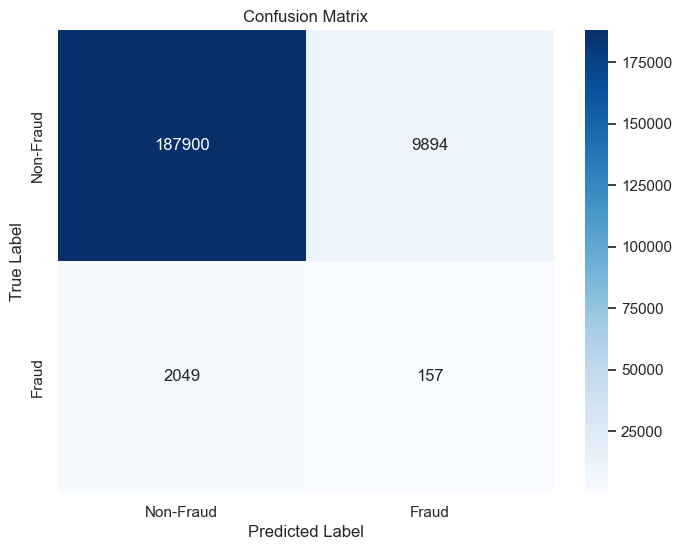

In [50]:
# Initialize results dictionaries
best_estimators = {}
best_scores = {}

# Loop over models (step 7)
for model_name, classifier in models.items():
    print(f"Running GridSearchCV for {model_name}...")
    
    # Create the pipeline with NearMiss
    pipeline = ImbPipeline([

        ('resampler', NearMiss()),  # Apply NearMiss under-sampling
        ('classifier', classifier)
    ])
    
    # Get parameter grid
    param_grid = param_grids[model_name]
    
    # Create GridSearchCV
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring=scorers,
        n_jobs=-1,
        cv=skf,
        refit='F1_score',
        verbose=2
    )
    
    # Fit the model
    grid_search.fit(X_train_preprocessed, y_train)
    
    # Store results
    best_estimators[model_name] = grid_search.best_estimator_
    best_scores[model_name] = grid_search.best_score_
    
    # Print the best parameters and score

    for model_name, model in best_estimators.items():
        print(f"Evaluating {model_name} on the test set...")
        
        y_pred_proba = model.predict_proba(X_test_preprocessed)[:, 1]
        


        # fprs[i], tprs[i], thresholds[i] corresponds to that operating point
        fprs, tprs, thresholds = roc_curve(y_test, y_pred_proba)

        # Identify the threshold closest to 5% FPR (0.05)
        target_fpr = 0.05
        abs_diff = np.abs(fprs - target_fpr)
        idx_5pct = np.argmin(abs_diff)
        threshold_5pct = thresholds[idx_5pct]

        print(f"Threshold for ~5% FPR is: {threshold_5pct:.4f}")
        print(f"Exact FPR at this threshold: {fprs[idx_5pct]:.4f}")
        print(f"Corresponding TPR (Recall): {tprs[idx_5pct]:.4f}")   

        y_pred_5pct = (y_pred_proba >= threshold_5pct).astype(int)
        cm_5pct = confusion_matrix(y_test, y_pred_5pct)
        print("Confusion Matrix at ~5% FPR threshold:")
        print(cm_5pct)

        report_5pct = classification_report(y_test, y_pred_5pct, digits=4)
        print("\nClassification Report at ~5% FPR threshold:")
        print(report_5pct)
        # 5. Visualize the confusion matrix using Seaborn's heatmap
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm_5pct, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title('Confusion Matrix')
        plt.show()  


- Precision (Fraud_Detection) = TP / TP + FP = 157 / (157 + 9894) = 00156
- Recall (Fraud_Detection) = TP / TP + FN = 157 / (157 + 2049) = 0.0711

- Precision (Non-Fraud) = Actual and Labeled as Non Fraud / All Labeled non fraud = 187900 / (187900 + 2049) = 0.9892
- Recall (Non-Fraud) = Actual and Labeled as Non Fraud / All Actual Non Fraud = TN / (TN + FP) = 187900 / (187900 + 9894) = 0.95


- Accuracy = #Correctly Labeled instance / Total Instance = (187900 + 157) / 200,0000 = 0.94
- False Positive Rate = FP / (FP + TN) = Actual Non Fraud labeled as Fraud / Actual Non Fraud labeled as Fraud + Actual Non Fraud label as Non Fraud \
                                                    = 9894 / (9894 + 187900) = 0.05


In [47]:
# Cutom metrics for FPR <= 0.05
import numpy as np
from sklearn.metrics import roc_curve, make_scorer
from sklearn.model_selection import StratifiedKFold, cross_val_score

def tpr_at_fixed_fpr(y_true, y_proba, fpr_target=0.05):
    """
    Returns the maximum TPR achieved at or below fpr_target (e.g. 0.05).
    
    :param y_true:   True binary labels (0 or 1).
    :param y_proba:  Predicted probabilities of class=1.
    :param fpr_target: The target (maximum) false-positive rate (e.g. 0.05).
    :return: The highest TPR achievable with FPR <= fpr_target.
    """
    fpr, tpr, thresholds = roc_curve(y_true, y_proba, pos_label=1)
    # Find all points where FPR <= desired threshold
    mask = (fpr <= fpr_target)
    
    if np.any(mask):
        return np.max(tpr[mask])  # best TPR among those points
    else:
        # If we can't reach FPR <= 0.05, return 0
        return 0
    
custom_scorer = make_scorer(
    tpr_at_fixed_fpr,
    needs_proba=True,      # We'll receive predicted probabilities
    greater_is_better=True # We want to maximize TPR
)
recall_scorer = make_scorer(recall_score, greater_is_better=True)

In [87]:
import lightgbm as lgb
import numpy as np
import optuna


def objective(trial):
    """
    Optuna objective function that returns the average TPR@5%FPR
    across CV folds for a LightGBM model in a pipeline with NearMiss.
    """

    # --- 1) Hyperparameter suggestions ---
    n_estimators = trial.suggest_int('n_estimators', 50, 120)
    max_depth = trial.suggest_int('max_depth', 7, 20)
    learning_rate = trial.suggest_float('learning_rate', 1e-3, 0.1, log=True)
    subsample = trial.suggest_float('subsample', 0.6, 0.8)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 0.8)
    
    # Optionally tune these as well:
    num_leaves = trial.suggest_int('num_leaves', 50, 150)
    reg_alpha = trial.suggest_float('reg_alpha', 1e-2, 10, log=True)
    reg_lambda = trial.suggest_float('reg_lambda', 1e-2, 10, log=True)
    # scale_pos_weight = trial.suggest_int('scale_pos_weight', 1, 10)

    # --- 2) Instantiate LightGBM with suggested params ---
    lgb_clf = lgb.LGBMClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        num_leaves = num_leaves,
        reg_alpha=reg_alpha,
        reg_lambda = reg_lambda,
        random_state=42
        # If you included num_leaves, reg_alpha, etc., set them here.
    )

    # --- 3) Build Pipeline: NearMiss + LightGBM ---
    pipeline_lgb = ImbPipeline([
        ('resampler', NearMiss()),
        ('classifier', lgb_clf)
    ])

    # --- 4) Cross-Validation with your custom scorer ---
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline_lgb, 
                             X_train_preprocessed, y_train,
                             scoring=custom_scorer, 
                             cv=skf, 
                             n_jobs=-1)

    # --- 5) Return average TPR@5%FPR across folds ---
    return scores.mean()


In [88]:
# Fit on training data
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=7)  # Try 20 different hyperparameter sets

[I 2025-01-05 20:16:05,840] A new study created in memory with name: no-name-3cf13304-a466-480e-8907-62e82d6d5eaa
[I 2025-01-05 20:16:22,738] Trial 0 finished with value: 0.06358381502890173 and parameters: {'n_estimators': 64, 'max_depth': 9, 'learning_rate': 0.015350315223106658, 'subsample': 0.7355545625037642, 'colsample_bytree': 0.6085596440835097, 'num_leaves': 91, 'reg_alpha': 0.09020749606232092, 'reg_lambda': 7.537350392444874}. Best is trial 0 with value: 0.06358381502890173.
[I 2025-01-05 20:16:39,835] Trial 1 finished with value: 0.051456420718576444 and parameters: {'n_estimators': 50, 'max_depth': 13, 'learning_rate': 0.0038990357426572884, 'subsample': 0.6067582460016241, 'colsample_bytree': 0.6377129087601274, 'num_leaves': 111, 'reg_alpha': 0.10984705310829067, 'reg_lambda': 0.06811589721819429}. Best is trial 0 with value: 0.06358381502890173.
[I 2025-01-05 20:16:56,983] Trial 2 finished with value: 0.058483509010540634 and parameters: {'n_estimators': 57, 'max_depth'

In [98]:
print("Best Trial:", study.best_trial.number)
print("Best Value (Mean TPR@5%FPR):", study.best_value)
print("Best Params:", study.best_trial.params)

Best Trial: 0
Best Value (Mean TPR@5%FPR): 0.06358381502890173
Best Params: {'n_estimators': 64, 'max_depth': 9, 'learning_rate': 0.015350315223106658, 'subsample': 0.7355545625037642, 'colsample_bytree': 0.6085596440835097, 'num_leaves': 91, 'reg_alpha': 0.09020749606232092, 'reg_lambda': 7.537350392444874}


In [95]:
params = study.best_trial.params
final_model = XGBClassifier()
final_model.set_params(**params)
pipeline_lgb = ImbPipeline([
    ('resampler', NearMiss()),
    ('classifier', final_model)
])
pipeline_lgb.fit(X_train_preprocessed, y_train)
y_test_pred = pipeline_lgb.predict(X_test_preprocessed)


In [96]:
rep = classification_report(y_test, y_test_pred)
print(rep)

              precision    recall  f1-score   support

           0       0.99      0.21      0.34    197794
           1       0.01      0.82      0.02      2206

    accuracy                           0.21    200000
   macro avg       0.50      0.51      0.18    200000
weighted avg       0.98      0.21      0.34    200000



In [97]:
y_train_pred = pipeline_lgb.predict(X_train_preprocessed)
rep = classification_report(y_train, y_train_pred)
print(rep)

              precision    recall  f1-score   support

           0       0.99      0.21      0.34    791177
           1       0.01      0.83      0.02      8823

    accuracy                           0.21    800000
   macro avg       0.50      0.52      0.18    800000
weighted avg       0.98      0.21      0.34    800000



In [81]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_preprocessed)

pca = PCA(n_components=0.95)  # Retain 95% variance
X_pca = pca.fit_transform(X_scaled)

# Apply the same transformation to test data
X_test_scaled = scaler.transform(X_test_preprocessed)
X_test_pca = pca.transform(X_test_scaled)


In [82]:
import lightgbm as lgb
import numpy as np
import optuna


def objective(trial):
    """
    Optuna objective function that returns the average TPR@5%FPR
    across CV folds for a LightGBM model in a pipeline with NearMiss.
    """

    # --- 1) Hyperparameter suggestions ---
    n_estimators = trial.suggest_int('n_estimators', 50, 120)
    max_depth = trial.suggest_int('max_depth', 7, 20)
    learning_rate = trial.suggest_float('learning_rate', 1e-3, 0.1, log=True)
    subsample = trial.suggest_float('subsample', 0.6, 0.8)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 0.8)
    
    # Optionally tune these as well:
    num_leaves = trial.suggest_int('num_leaves', 50, 150)
    reg_alpha = trial.suggest_float('reg_alpha', 1e-2, 10, log=True)
    reg_lambda = trial.suggest_float('reg_lambda', 1e-2, 10, log=True)
    # scale_pos_weight = trial.suggest_int('scale_pos_weight', 1, 10)

    # --- 2) Instantiate LightGBM with suggested params ---
    lgb_clf = lgb.LGBMClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        num_leaves = num_leaves,
        reg_alpha=reg_alpha,
        reg_lambda = reg_lambda,
        random_state=42
        # If you included num_leaves, reg_alpha, etc., set them here.
    )

    # --- 3) Build Pipeline: NearMiss + LightGBM ---
    pipeline_lgb = ImbPipeline([
        ('resampler', NearMiss()),
        ('classifier', lgb_clf)
    ])

    # --- 4) Cross-Validation with your custom scorer ---
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline_lgb, 
                             X_pca, y_train,
                             scoring=recall_scorer, 
                             cv=skf, 
                             n_jobs=-1)

    # --- 5) Return average TPR@5%FPR across folds ---
    return scores.mean()

In [83]:
# Fit on training data
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=7)  # Try 20 different hyperparameter sets

[I 2025-01-05 20:11:14,723] A new study created in memory with name: no-name-0b8f6e14-7ad5-4a72-983b-9d95361b14ba
[I 2025-01-05 20:11:32,954] Trial 0 finished with value: 0.8148022214666213 and parameters: {'n_estimators': 89, 'max_depth': 18, 'learning_rate': 0.00853034816404929, 'subsample': 0.6019051308175187, 'colsample_bytree': 0.536513426818499, 'num_leaves': 116, 'reg_alpha': 0.02230146005076824, 'reg_lambda': 2.4805821987446324}. Best is trial 0 with value: 0.8148022214666213.
[I 2025-01-05 20:11:52,138] Trial 1 finished with value: 0.7907741131134535 and parameters: {'n_estimators': 117, 'max_depth': 10, 'learning_rate': 0.008601796003128888, 'subsample': 0.6185577309191003, 'colsample_bytree': 0.5632790066406641, 'num_leaves': 135, 'reg_alpha': 0.11068995777246575, 'reg_lambda': 0.020973996579367223}. Best is trial 0 with value: 0.8148022214666213.
[I 2025-01-05 20:12:09,486] Trial 2 finished with value: 0.8234160716309645 and parameters: {'n_estimators': 54, 'max_depth': 20,

In [92]:
print("Best Trial:", study.best_trial.number)
print("Best Value (Mean TPR@5%FPR):", study.best_value)
print("Best Params:", study.best_trial.params)

Best Trial: 0
Best Value (Mean TPR@5%FPR): 0.06358381502890173
Best Params: {'n_estimators': 64, 'max_depth': 9, 'learning_rate': 0.015350315223106658, 'subsample': 0.7355545625037642, 'colsample_bytree': 0.6085596440835097, 'num_leaves': 91, 'reg_alpha': 0.09020749606232092, 'reg_lambda': 7.537350392444874}


In [93]:
params = study.best_trial.params
final_model = XGBClassifier()
final_model.set_params(**params)
pipeline_lgb = ImbPipeline([
    ('resampler', NearMiss()),
    ('classifier', final_model)
])
pipeline_lgb.fit(X_pca, y_train)
y_test_pred = pipeline_lgb.predict(X_test_pca)

tmp = classification_report(y_test, y_test_pred)
print(tmp)

              precision    recall  f1-score   support

           0       0.98      0.14      0.25    197794
           1       0.01      0.78      0.02      2206

    accuracy                           0.15    200000
   macro avg       0.50      0.46      0.13    200000
weighted avg       0.97      0.15      0.25    200000



# DUNG O DAY THOI

### 4.2 Building Pipeline for Imputing missing values, scale features, feature selection

##### 1. Binary Variables
The following features are already binary, so we can generally keep them as 0/1 (or False/True) without further encoding:
- email_is_free (free vs. paid)
- phone_home_valid (invalid vs. valid)
- phone_mobile_valid (invalid vs. valid)
- has_other_cards (no vs. yes)
- foreign_request (same country vs. different country)
- keep_alive_session (off vs. on)

##### 2. Categorical Variables (Nominal)
For categorical variables with a small number of distinct categories (like 2 to ~10), One-Hot Encoding is a common, straightforward option. This expands each category into its own feature column containing 0 or 1.

- a. payment_type
Possible Values: 5 anonymized categories.
Recommended Encoding: One-Hot Encoding (a new column for each of the 5 categories; typically results in 4 additional columns if drop_first=True).

- b. employment_status
Possible Values: 7 anonymized categories.
Recommended Encoding: One-Hot Encoding, which would create up to 7 columns (6 with drop_first=True).

- c. housing_status
Possible Values: 7 anonymized categories.
Recommended Encoding: One-Hot Encoding (again, up to 7 new columns).

- d. source
Possible Values: 2 (INTERNET, TELEAPP).
Recommended Encoding: One-Hot Encoding or binary mapping. Since there are only two values, you could do:
1 = INTERNET, 0 = TELEAPP
or just use One-Hot (which produces a single dummy column if you use drop_first=True).

- e. device_os
Possible Values: 5 (Windows, macOS, Linux, X11, other).
Recommended Encoding: One-Hot Encoding (4 columns if drop_first=True).

In [148]:
# Identify which columns are numeric vs. categorical
num_features = ['income', 'name_email_similarity', 'current_address_months_count', 'customer_age', 'days_since_request'
                    , 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 
                    'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'bank_months_count', 'proposed_credit_limit',  'session_length_in_minutes',
                    'device_distinct_emails_8w', 'month']


cat_features = ['payment_type', 'employment_status', 'housing_status',
                         'source', 'device_os']

binary_features = [
    'email_is_free',
    'phone_home_valid',
    'phone_mobile_valid',
    'has_other_cards',
    'foreign_request',
    'keep_alive_session',
]

len(num_features), len(cat_features), len(binary_features)

(17, 5, 6)

In [149]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif, chi2





# Building pipeline


# --- Numerical Pipeline ---
# 1. Impute missing values (median) (distribution of missing data is mostly skewed)
# 2. Scale features (Robust scaler) 
# 3. Feature selection with f_classif (for classification with numeric features)

numeric_pipeline = Pipeline(
    [
        ('num_imputer', SimpleImputer(strategy='median')),
        ('scaler', RobustScaler()),
        ('num_feature_select', SelectKBest(score_func=f_classif, k='all')) # Annova F measure
    ]
)

# --- Categorical Pipeline ---
# 1. Impute missing values (most frequent)
# 2. OneHotEncoder
# 3. Feature selection with chi2 or mutual_info_classif

cat_pipeline = Pipeline(
    [
        ('cat_imputer', SimpleImputer(strategy='most_frequent')),
        ('cat_encoder', OneHotEncoder()),
        ('cat_feature_select', SelectKBest(score_func=chi2, k='all'))
    ]
)

# --- Binary Pipeline ------
# -----------------------------------------------
# Usually, keep binary features as 0/1 with minimal or no transformation.
# - Optional imputation if these fields have missing values
# - Typically no scaling or OHE needed

binary_pipeline = Pipeline([
    
    ('bin_imputer', SimpleImputer(strategy='most_frequent')),

])


# --- Combine Pipelines into a ColumnTransformer 

preprocessor = ColumnTransformer(
    [
        ("num_pipeline", numeric_pipeline, num_features),
        ("cat_pipeline", cat_pipeline, cat_features), 
        ("binary_pipeline", binary_pipeline, binary_features)
    ]
)

#### We will use Logistic Regression with GridSearchCV to choose the best **k**


#### Remark
- The data is highly imbalance, therefore we need to sample the data later inorder to balance out two class in target variable.
When should we use sample technique such as SMOTE and Nearmiss

- According to the paper, **feature selection should be performed before applying SMOTE** when dealing with high-dimensional data. The reasoning is that performing feature selection first **helps reduce the dimensionality, removing irrelevant variables** that could otherwise negatively influence the oversampling process and the classification results.

https://pmc.ncbi.nlm.nih.gov/articles/PMC3648438/

In [150]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Combine the 'preprocessor' (ColumnTransformer) with a final classifier
final_pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])


param_grid = {
    "preprocessing__num_pipeline__num_feature_select__k": [5, 10, 15, "all"],
    "preprocessing__cat_pipeline__cat_feature_select__k": [5, 10, 15, "all"],
    # You could also tune classifier hyperparameters, e.g.:
    # "classifier__C": [0.1, 1.0, 10]
}

# Perform grid search CV across param grid
grid_search = GridSearchCV(
    estimator=final_pipeline,
    param_grid=param_grid,
    scoring="recall",  # Instead of "roc_auc"
    cv=5,
    n_jobs=-1, # Use all cores
    refit=True
)

In [151]:
# Fit the model

grid_search.fit(X_train, y_train)


KeyboardInterrupt: 

In [86]:
from sklearn.metrics import classification_report
print("Best params:", grid_search.best_params_)

# Evaluate on test set
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

Best params: {'classifier__C': 0.001, 'classifier__l1_ratio': 0.2, 'classifier__penalty': 'elasticnet', 'classifier__solver': 'saga'}
              precision    recall  f1-score   support

           0       0.99      0.42      0.59    197794
           1       0.01      0.67      0.03      2206

    accuracy                           0.43    200000
   macro avg       0.50      0.55      0.31    200000
weighted avg       0.98      0.43      0.59    200000



#### Insights

Class 1

- Recall: 0.01
-  Interpretation: The model only correctly identifies 1% of all actual Class 1 instances.

=> Model fail to identify a fraud application most of the time. This is due to high class imbalance between fraud and non fraud application.

In [34]:
# Utility function
def prepare_inputs(X_train,y_train, X_test, preprocessor):
	preprocessor_obj = preprocessor
	
	X_train_enc = preprocessor_obj.fit_transform(X_train,y_train)
	X_test_enc = preprocessor_obj.transform(X_test)
	return X_train_enc, X_test_enc

In [35]:
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train,y_train ,X_test, preprocessor)

## 5. Apply undersampling

Let's apply undersampling into our final pipeline

In [30]:
#from imblearn.under_sampling import TomekLinks, RandomUnderSampler, EditedNearestNeighbours
#from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

# Use for adding sampling technique into a Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline

# Advance model ( will investigate later )
# from sklearn.ensemble import RandomForestClassifier




In [ ]:
# Combine undersampling technique with final classifier
final_pipeline_undersampling = ImbPipeline([
    ("preprocessing", preprocessor),
    ("resampler", NearMiss()),  # Placeholder
    ("classifier", LogisticRegression(max_iter=2000))
])


param_grid = [
    # 1) LogisticRegression parameters
    {
        "preprocessing__num_pipeline__num_feature_select__k": [5, 10, 15, "all"],
        "preprocessing__cat_pipeline__cat_feature_select__k": [5, 10, 15, "all"],

        "classifier": [LogisticRegression(max_iter=2000)],

        # For LR, tune regularization strength, and possibly penalty
        "classifier__C": [0.01, 0.1, 1, 10],
        "classifier__class_weight": [None, "balanced"]
    },
]

# This emphasizes recall more than precision but still balances them, potentially mitigating the extremely high FPR issue of a pure recall objective.
custom_scorer = make_scorer(fbeta_score, beta=2)


# 4. StratifiedKFold for stable splits and run GridSearch
###############################################################################
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=final_pipeline_undersampling,
    param_grid=param_grid,
    scoring=custom_scorer,  # Instead of "recall" because this might result in a very high false positive rate
    cv=skf,
    n_jobs=-1, # Use all cores
    refit=True
)


NameError: name 'make_scorer' is not defined

In [ ]:
# Fit the model
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          RobustScaler()),
                                                                                         ('num_feature_select',
                                                                                          SelectKBest(k='all'))]),
                                                                         ['income',
                                                                          'name_email_similarity',
                                                                          'current_addres...
                                        LogisticRegression(max_iter=2000))]),
             n_jobs=-1,
             param_grid=[{'classifier': [LogisticRegression(max_iter=2000)],
                          'classifier__C': [0.01, 0.1, 1, 10],
                          'classifier__class_weight': [None, 'balanced'],
                          'preprocessing__cat_pipeline__cat_feature_select__k': [5,
                                                                                 10,
                                                                                 15,
                                                                                 'all'],
                          'preprocessing__num_pipeline__num_feature_select__k': [5,
                                                                                 10,
                                                                                 15,
                                                                                 'all']}],
             scoring=make_scorer(fbeta_score, beta=2))

In [ ]:
# 5. Evaluate the best model on the test set
###############################################################################
print("Best Params:", grid_search.best_params_)
print("Best F2 Score (CV):", grid_search.best_score_)

best_model = grid_search.best_estimator_

# Predict on test set
y_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

# print("\nClassification Report on Test Set:")
# print(classification_report(y_test, y_pred, target_names=["Non-Fraud", "Fraud"]))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
fpr = fp / (fp + tn)
recall = tp / (tp + fn)
precision = tp / (tp + fp)
print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")

Best Params: {'classifier__max_depth': 6, 'classifier__n_estimators': 100}
Best F2 Score (CV): 0.051967546871986306
False Positive Rate (FPR): 0.8775
Recall: 0.8776
Precision: 0.0110


#### insight
- Really good recall score: 0.7933 (improvement from 0.01). \
    -> Model is better identifying fraud applications

- However, False Positive Rate (FPR) is very high (0.6717) with a low Precision score (0.0130).
    -> Model is not good in realizing good applications

#### Strategy
- Let's try to fix the number of features we discover above: 5 for categorical and 10 for numerical features
- Explore different combinations of regularization parameter 'C' and 'class_weight'

In [32]:
from sklearn.metrics import make_scorer, fbeta_score
# Fixing number of features
fixed_k_num = [10]
fixed_k_cat = [5]

#class weight
class_weight = [#{0: 0.9, 1: 0.1},
                {0: 0.7, 1: 0.3},
                #{0: 0.6, 1: 0.4}
                ]

#Regularization param
classifier_c = [0.0025, 0.005, 0.0075]

# Define custom scorers for beta=1 (F1 score) and beta=2
f1_scorer = make_scorer(fbeta_score, beta=1)
f2_scorer = make_scorer(fbeta_score, beta=2)

scorers = {
    'F1_score': f1_scorer,
    'F2_score': f2_scorer
}

models = {
    "RandomForestClassifier": RandomForestClassifier(),
}

NameError: name 'RandomForestClassifier' is not defined

In [48]:

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import NearMiss
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, fbeta_score, precision_score, recall_score, confusion_matrix, classification_report

# 1. Define numeric & categorical pipelines with fixed k=10, k=5
final_pipeline_undersampling = ImbPipeline([
    ("preprocessing", preprocessor),
    ("resampler", NearMiss()),  # Placeholder
    ("classifier", LogisticRegression(max_iter=2000))
])




# 2. Param grid with multiple penalty/solver combos for LR
param_grid = [
    {
        "preprocessing__num_pipeline__num_feature_select__k": fixed_k_num,
        "preprocessing__cat_pipeline__cat_feature_select__k": fixed_k_cat,
        "classifier__C": classifier_c, # Previously find best C = 0.01
        "classifier__class_weight": class_weight
    },

        
        # Advance tunning (explore later)
    # {
    #     "classifier__penalty": ["l2"],
    #     "classifier__solver": ["lbfgs"],
    #     "classifier__C": [0.001, 0.01],
    #     #"classifier__class_weight": [None, "balanced"]
    # },
    # {
    #     "classifier__penalty": ["l1", "l2"],
    #     "classifier__solver": ["liblinear"],
    #     "classifier__C": [0.001, 0.01],
    #     #"classifier__class_weight": [None, "balanced"]
    # },
    # {
    #     "classifier__penalty": ["elasticnet"],
    #     "classifier__solver": ["saga"],
    #     "classifier__C": [0.001, 0.01],
    #     #"classifier__class_weight": [None, "balanced"],
    #     "classifier__l1_ratio": [0.2, 0.5, 0.8]
    #}
]



In [35]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=final_pipeline_undersampling,
    param_grid=param_grid,
    scoring=scorers, # can try different scoring
    cv=skf,
    n_jobs=-1,
    refit="F2_score"
)

In [118]:
# 3. Fit & Evaluate
grid_search.fit(X_train, y_train)
print("Best Params:", grid_search.best_params_)
print("Best F1 Score (CV):", grid_search.best_score_)

Best Params: {'classifier__C': 0.0025, 'classifier__class_weight': {0: 0.7, 1: 0.3}, 'preprocessing__cat_pipeline__cat_feature_select__k': 5, 'preprocessing__num_pipeline__num_feature_select__k': 10}
Best F1 Score (CV): 0.08636601246858805


In [120]:


best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
y_probs = best_model.predict_proba(X_test)[:, 1]

print("\nClassification Report (threshold=0.5):")
print(classification_report(y_test, y_pred, target_names=["Non-Fraud", "Fraud"]))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
fpr = fp / (fp + tn)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

print(f"FPR: {fpr:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")

# 4. Optional: Threshold Tuning
import numpy as np

thresholds = np.linspace(0, 1, 101)
best_thresh = 0.5
best_prec = 0.0

for t in thresholds:
    y_pred_t = (y_probs >= t).astype(int)
    prec_t = precision_score(y_test, y_pred_t)
    if prec_t > best_prec:
        best_prec = prec_t
        best_thresh = t

print(f"Best threshold for max precision: {best_thresh}")
y_pred_custom = (y_probs >= best_thresh).astype(int)

tn2, fp2, fn2, tp2 = confusion_matrix(y_test, y_pred_custom).ravel()
fpr2 = fp2 / (fp2 + tn2)
prec2 = precision_score(y_test, y_pred_custom)
rec2 = recall_score(y_test, y_pred_custom)

print("\nWith Custom Threshold:")
print(f"Threshold: {best_thresh:.2f}")
print(f"FPR: {fpr2:.4f}")
print(f"Precision: {prec2:.4f}")
print(f"Recall: {rec2:.4f}")



Classification Report (threshold=0.5):
              precision    recall  f1-score   support

   Non-Fraud       0.99      0.71      0.83    197794
       Fraud       0.02      0.53      0.04      2206

    accuracy                           0.71    200000
   macro avg       0.51      0.62      0.43    200000
weighted avg       0.98      0.71      0.82    200000

FPR: 0.2911
Precision: 0.0200
Recall: 0.5340
Best threshold for max precision: 0.97

With Custom Threshold:
Threshold: 0.97
FPR: 0.0005
Precision: 0.0714
Recall: 0.0032


#### Insight
- After tunning diffenrent parameters (class weight, classifier_c), my model precision score does not improve much. On the other hand, recall score is getting worse and worse (0.53) \
-> Might try different models

let's try XGBoost

In [ ]:
from xgboost import XGBClassifier
final_pipeline_xgb = ImbPipeline([
    ("preprocessing", preprocessor),
    ("resampler", NearMiss()),  # Placeholder
    ("classifier", XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Hyperparameter grid
param_grid_xgb = {
    'classifier__n_estimators': [100],
    'classifier__max_depth': [3, 6, 9],
    # 'classifier__learning_rate': [0.01, 0.1],
    # 'classifier__subsample': [0.8, 1],
    # 'classifier__colsample_bytree': [0.8, 1],
    #'classifier__scale_pos_weight': [1, ratio]
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=final_pipeline_xgb,
    param_grid=param_grid_xgb,
    scoring=scorers, # can try different scoring
    cv=skf,
    n_jobs=-1,
    refit="F2_score"
)

In [ ]:
# 3. Fit & Evaluate
grid_search.fit(X_train, y_train)
print("Best Params:", grid_search.best_params_)
print("Best F1 Score (CV):", grid_search.best_score_)

Best Params: {'classifier__max_depth': 6, 'classifier__n_estimators': 100}
Best F1 Score (CV): 0.051967546871986306


In [ ]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
y_probs = best_model.predict_proba(X_test)[:, 1]

print("\nClassification Report (threshold=0.5):")
print(classification_report(y_test, y_pred, target_names=["Non-Fraud", "Fraud"]))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
fpr = fp / (fp + tn)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

print(f"FPR: {fpr:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")

# 4. Optional: Threshold Tuning
import numpy as np

thresholds = np.linspace(0, 1, 101)
best_thresh = 0.5
best_prec = 0.0

for t in thresholds:
    y_pred_t = (y_probs >= t).astype(int)
    prec_t = precision_score(y_test, y_pred_t)
    if prec_t > best_prec:
        best_prec = prec_t
        best_thresh = t

print(f"Best threshold for max precision: {best_thresh}")
y_pred_custom = (y_probs >= best_thresh).astype(int)

tn2, fp2, fn2, tp2 = confusion_matrix(y_test, y_pred_custom).ravel()
fpr2 = fp2 / (fp2 + tn2)
prec2 = precision_score(y_test, y_pred_custom)
rec2 = recall_score(y_test, y_pred_custom)

print("\nWith Custom Threshold:")
print(f"Threshold: {best_thresh:.2f}")
print(f"FPR: {fpr2:.4f}")
print(f"Precision: {prec2:.4f}")
print(f"Recall: {rec2:.4f}")


Classification Report (threshold=0.5):
              precision    recall  f1-score   support

   Non-Fraud       0.99      0.12      0.22    197794
       Fraud       0.01      0.88      0.02      2206

    accuracy                           0.13    200000
   macro avg       0.50      0.50      0.12    200000
weighted avg       0.98      0.13      0.22    200000

FPR: 0.8775
Precision: 0.0110
Recall: 0.8776
Best threshold for max precision: 0.24

With Custom Threshold:
Threshold: 0.24
FPR: 0.9271
Precision: 0.0111
Recall: 0.9370


Confusion Matrix:
[[ 24227 173567]
 [   270   1936]]


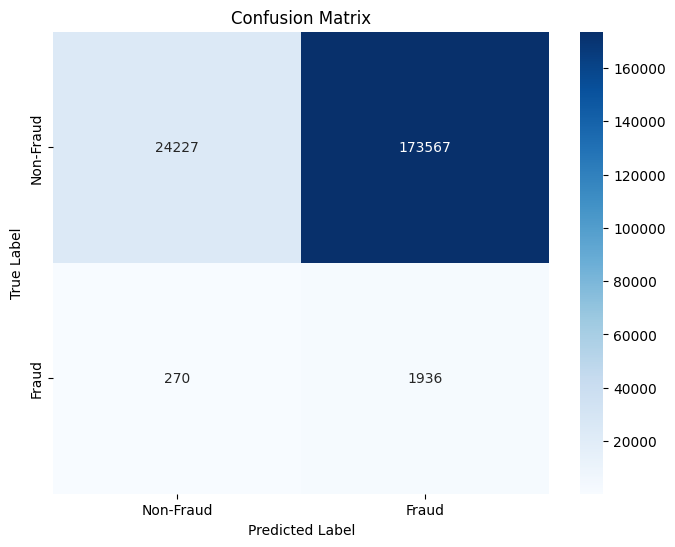

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have the following already defined:
# - grid_search: your trained GridSearchCV object
# - X_test: your test features
# - y_test: your test labels

# 1. Get the best estimator from GridSearchCV
best_model = grid_search.best_estimator_

# 2. Make predictions on the test set
# If your pipeline includes a classifier that outputs class labels, use predict()
y_pred = best_model.predict(X_test)

# 3. Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

# 4. Display the confusion matrix as plain numbers
print("Confusion Matrix:")
print(cm)

# 5. Visualize the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
